In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [14]:
x=pd.read_csv("EAST MADHYA PRADESH.csv")


In [15]:
columns_to_drop = ["Unnamed: 0"]
data_clean = x.drop(columns_to_drop,axis = 1)
x = data_clean


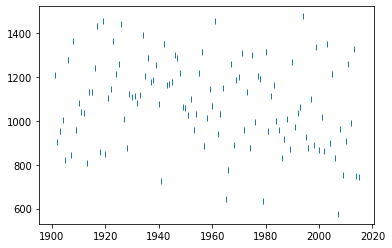

In [16]:
y1=list(x["YEAR"])
x1=list(x["Jun-Sep"])
z1=list(x["JUN"])
w1=list(x["MAY"])

plt.plot(y1, x1,'|')
plt.show()

In [22]:
flood=[]
june=[]
sub=[]
#APPROAXIMATELY FINDING THE RAINFALL DATA FOR 10 DAYS FOR THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))


#CREATING A NEW COLOUMN WITH BINARY CLASSIFICATION DEPENDING IF THAT YEAR HAD FLOODED OR NOT, USING RAINFALL OF THAT YEAR AS THRESHOLD
#flood,rain,heavy rain
for i in range(0,len(x1)):
    if x1[i]>1400 or june[i] > 100 or sub[i] > 280:
        flood.append('1')
    elif x1[i] < 800  or june[i] < 20  or sub[i] < 50:
        flood.append('0')
    else:
        flood.append('-1')





df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

x["flood"]=flood
x["avgjune"]=june
x["sub"]=sub

#SAVING THE NEW CSV FILE WITH THE NEW COLOUMNS
x.to_csv("out1.csv")
print((x))
        
        
      

             SUBDIVISION  YEAR    JAN    FEB   MAR   APR   MAY    JUN    JUL  \
0    EAST MADHYA PRADESH  1901   48.5   38.1  15.7  10.7   6.2   61.0  367.5   
1    EAST MADHYA PRADESH  1902   14.9    8.9   0.0   3.6   2.7   28.0  411.9   
2    EAST MADHYA PRADESH  1903    5.6    2.9   0.3   0.9  37.5   67.5  261.4   
3    EAST MADHYA PRADESH  1904    2.0   15.3  48.2   0.0   8.6  109.9  443.2   
4    EAST MADHYA PRADESH  1905   15.9    8.0  14.3  12.3  10.2   34.4  292.4   
5    EAST MADHYA PRADESH  1906   12.1   28.3  30.8   0.0   3.5  226.1  444.2   
6    EAST MADHYA PRADESH  1907    7.0  103.1   4.5  30.5   5.1   90.9  221.9   
7    EAST MADHYA PRADESH  1908   18.2   17.0   9.4   1.4   3.4  117.7  528.9   
8    EAST MADHYA PRADESH  1909   19.8   16.3   5.3  72.4   6.2  208.5  387.0   
9    EAST MADHYA PRADESH  1910   10.0    0.1   0.2   2.6   9.6  221.3  225.6   
10   EAST MADHYA PRADESH  1911   22.7    0.8  15.9   0.8   3.9  204.7  175.9   
11   EAST MADHYA PRADESH  1912    8.4   

In [23]:

import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [24]:
#TAKING THE COLOUMNS WHICH ARE TO USED FOR TRAINING THE MODEL
#16 MAR-MAY
#20- AVG OF 10 DAYS JUNE 
#21- DIFFERENCE OF RAINFALL FROM MAY TO JUNE
#19 - BINARY CLASS OF FLOOD- 0 OR 1 or -1
#MORE DATA CAN BE ADDED FOR TRAINING, BY JUST ADDING MORE NUMBER OF COLOUMNS FROM THE CSV FILE

#WE USE LOGISTIC REGRESSION FOR TRAINING
X = x.ix[:,{16,20,21}].values
y1=x.ix[:,19].values
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y1, random_state=0)


c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [25]:
Lr=LogisticRegression()

Lr.fit(X,y1)
print(Lr.score(X_test,Y_test)) 


0.6551724137931034


c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rahul\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [26]:
np.unique(y1)

array(['-1', '0', '1'], dtype=object)

In [27]:
import pickle
Pkl_Filename = "madhya pradesh.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(Lr, file)